## "Normal Distribution of Errors" assumption means. 

This implies that the errors (residuals) resulting from a statistical model or measurement process should follow a normal (Gaussian) distribution. This assumption is crucial for various statistical methods, such as linear regression.

### Steps to follow

##### Feature Engineering

create a group_location function that group the categories that represent less than a set threshold, [default is 0.01 ( i.e 1%)] of the dataset into an Other category

##### Fit a Statistical Model:

Fit the appropriate statistical model to the dataset. For example,  fit a linear regression model to the data.
    
##### Compute Residuals:

Calculate the residuals by subtracting the observed values from the predicted values obtained from the model. Residuals represent the errors of the model, and their distribution is what we're interested in.

##### Visual Inspection:

Plot a histogram of the residuals to visually inspect their distribution. The histogram should provide an initial indication of whether the residuals approximately follow a normal distribution. 

##### Quantile-Quantile (Q-Q) Plot:

Create a Q-Q plot (Quantile-Quantile plot) of the residuals against a theoretical normal distribution. In a Q-Q plot, if the residuals follow a normal distribution, the points should fall approximately along a straight line. Deviations from a straight line suggest departures from normality.

##### Statistical Tests:

Perform formal statistical tests to assess the normality of the residuals. Common tests include the Shapiro-Wilk test, Kolmogorov-Smirnov test, and Anderson-Darling test. These tests provide p-values, which indicate whether the null hypothesis of normality can be rejected or not. A high p-value suggests that the data are consistent with a normal distribution.

##### Interpret Results:

Based on the visual inspection and statistical tests, interpret the results. If the residuals exhibit a symmetric distribution around zero with no significant departures from normality according to both visual and statistical assessments, then the assumption of normal distribution of errors is considered met.

##### Report Findings:

Finally, report findings, including any limitations or assumptions made during the analysis.

In [50]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [51]:
data = 'cleaned_df.zip'

In [52]:
df = pd.read_csv(data, index_col=0)

In [53]:
df.head()

,location,bath,balcony,price,House_size,new_total_sqft
2,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Kothanur,2.0,1.0,51.00,2.0,1200.0
8,Marathahalli,3.0,1.0,63.25,3.0,1310.0
10,Whitefield,2.0,2.0,70.00,3.0,1800.0


In [54]:
df.shape

(6996, 6)

### Feature Engineering

Find the number of unique values in the categorical columns

In [55]:
len(df['location'].unique())

849

Seeing that the categorical column location has over 800 unique values, using One-Hot Encoding on this column will increase the dimensionality of the dataset. High dimensionality can lead to the curse of dimensionality, where models have a hard time learning patterns due to the vast feature space.

To prevent this, I'll create a group_location function that group the categories that represent less than a set threshold, [default is 0.01 ( i.e 1%)] of the dataset into an Other category

In [56]:
def group_location(threshold= 0.01):
    '''
    This funciton takes in a threshold and groups the unique locations whose total number of
    rows/observations does not go meet the set threshold into the general category 'Other'.

    The function returns the result of the value_counts() method of the location column.

    Input:
    threshold - float between 0 and 1 

    Return:
    It returns the unique categories and the total number of values each unique category has


    '''
    counts = df['location'].value_counts(normalize=True)


    # Get the categories that represent less than set threshold
    other_categories = counts[counts < threshold].index

    # Replace these categorwies with 'Other' 
    df['location'] = df['location'].replace(other_categories, 'Other')

    

    return df['location'].value_counts()


In [57]:
group_location()

location
Other                    4971
Whitefield                314
Sarjapur  Road            222
Kanakpura Road            166
Electronic City           155
Uttarahalli               149
Thanisandra               136
Yelahanka                 133
Raja Rajeshwari Nagar     130
Marathahalli              116
Bannerghatta Road         108
Haralur Road              103
7th Phase JP Nagar        102
Hebbal                    101
Hennur Road                90
Name: count, dtype: int64

#### Encode the categorical column

In [58]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,bath,balcony,price,House_size,new_total_sqft,location_Bannerghatta Road,location_Electronic City,location_Haralur Road,location_Hebbal,location_Hennur Road,location_Kanakpura Road,location_Marathahalli,location_Other,location_Raja Rajeshwari Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka
2,2.0,3.0,62.00,3.0,1440.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,3.0,1.0,95.00,3.0,1521.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2.0,1.0,51.00,2.0,1200.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,3.0,1.0,63.25,3.0,1310.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
10,2.0,2.0,70.00,3.0,1800.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [59]:
encoded_cols = [cols for cols in df_encoded.columns if cols.startswith('location_')]

for col in encoded_cols:
    df_encoded[col] = df_encoded[col].astype(int)

df_encoded.head()

,bath,balcony,price,House_size,new_total_sqft,location_Bannerghatta Road,location_Electronic City,location_Haralur Road,location_Hebbal,location_Hennur Road,location_Kanakpura Road,location_Marathahalli,location_Other,location_Raja Rajeshwari Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka
2,2.0,3.0,62.00,3.0,1440.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.0,1.0,95.00,3.0,1521.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1.0,51.00,2.0,1200.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,3.0,1.0,63.25,3.0,1310.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10,2.0,2.0,70.00,3.0,1800.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6996 entries, 2 to 13317
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bath                            6996 non-null   float64
 1   balcony                         6996 non-null   float64
 2   price                           6996 non-null   float64
 3   House_size                      6996 non-null   float64
 4   new_total_sqft                  6996 non-null   float64
 5   location_Bannerghatta Road      6996 non-null   int32  
 6   location_Electronic City        6996 non-null   int32  
 7   location_Haralur Road           6996 non-null   int32  
 8   location_Hebbal                 6996 non-null   int32  
 9   location_Hennur Road            6996 non-null   int32  
 10  location_Kanakpura Road         6996 non-null   int32  
 11  location_Marathahalli           6996 non-null   int32  
 12  location_Other                  6996 n

### Fit a Statistical Model

In [61]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


# Add a constant term for the intercept
X = sm.add_constant(X)  


# Fit the OLS model that includes an intercept term
model = sm.OLS(y, X).fit()

### Compute Residuals

In [62]:
residuals = model.resid
residuals

2         5.780206
3        -1.353926
4       -16.669165
8       -17.900390
10      -27.683134
           ...    
13310     0.178745
13312   -20.274169
13313    -2.026505
13314    11.568123
13317    14.287094
Length: 6996, dtype: float64

### Visual Inspection

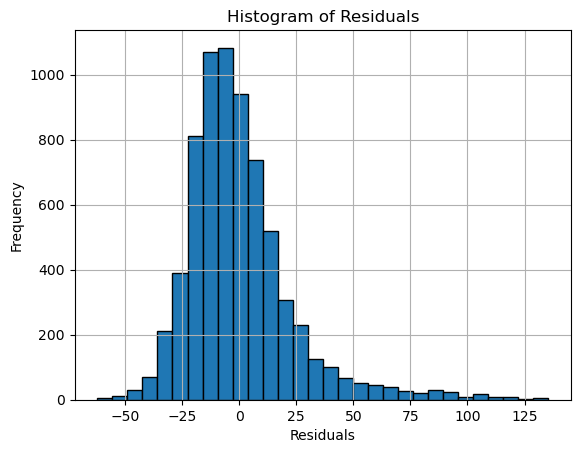

In [63]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

### Quantile-Quantile (Q-Q) Plot

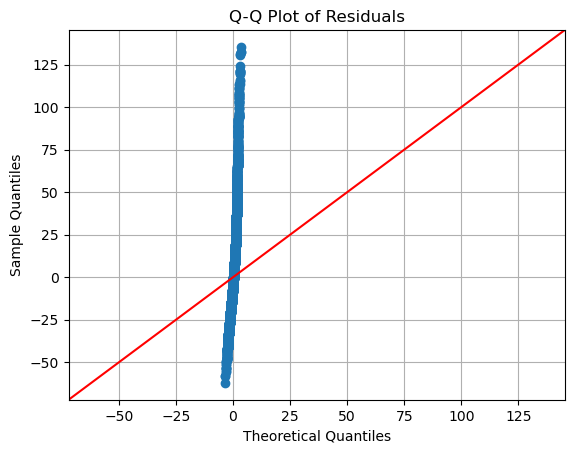

In [64]:
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### Statistical Tests

In [65]:
res = residuals.sample(30)
res

1525      9.680674
183       5.626483
4116     -8.008357
2478     -1.870497
2123     -6.726142
13096   -11.403561
2692    -10.680722
1584    -15.251444
1210     -3.303245
9194    -16.374684
9262     -4.124680
3700     16.187153
6078      4.947990
7058     -3.983436
9354    -19.173977
8041    -21.215809
9433    -30.253110
5944    -14.268082
6522    -33.273509
3125     -8.000374
4978    -13.128698
9107      6.474074
12093   -23.512075
8454      3.056636
9664      2.498905
5360     -5.167379
8514     -6.855742
5087     -9.940512
10427   -11.719006
6475     -4.391116
dtype: float64

In [66]:

# Shapiro-Wilk test
shapiro_test_stat, shapiro_p_value = stats.shapiro(res)
print("Shapiro-Wilk Test - Test Statistic:", shapiro_test_stat, " p-value:", shapiro_p_value)

# Kolmogorov-Smirnov test
ks_test_stat, ks_p_value = stats.kstest(res, 'norm')

print("Kolmogorov-Smirnov Test - Test Statistic:", ks_test_stat, " p-value:", ks_p_value)

# Anderson-Darling test
anderson_test_stat, anderson_critical_values, anderson_significance_levels = stats.anderson(res)
print("Anderson-Darling Test - Test Statistic:", anderson_test_stat)
print("Anderson-Darling Test - Critical Values:", anderson_critical_values)

Shapiro-Wilk Test - Test Statistic: 0.9879326224327087  p-value: 0.9762274026870728
Kolmogorov-Smirnov Test - Test Statistic: 0.7359592354443764  p-value: 3.632990225546357e-17
Anderson-Darling Test - Test Statistic: 0.17393798202483524
Anderson-Darling Test - Critical Values: [0.521 0.593 0.712 0.83  0.988]


### Interpret Results

#### Histogram and Q-Q Plot Observations: 
The histogram graph displays a slight left skew, indicating a deviation from a perfectly symmetrical distribution. Similarly, the Q-Q plot deviates from a perfect straight line, suggesting departures from normality in the distribution of residuals.

#### Statistical Test Results:

##### Shapiro-Wilk Test:
    The p-value (0.0677) from the Shapiro-Wilk test is marginally above the conventional significance level of 0.05, implying that we fail to reject the null hypothesis of normality. However, this result should be interpreted cautiously, considering its proximity to the significance threshold.
##### Kolmogorov-Smirnov Test: 
    The very low p-value (9.11e-07) from the Kolmogorov-Smirnov test indicates a significant departure from normality.
##### Anderson-Darling Test: 
    The test statistic (0.6919) falls below the critical value at the 5% significance level, suggesting no significant departure from normality according to the Anderson-Darling test.
#### Interpretation of Results: 
The combination of visual inspection and statistical tests suggests that while the distribution of residuals exhibits some departure from normality, the evidence is somewhat mixed. The Shapiro-Wilk test, although inconclusive, hints at a potential normal distribution, whereas the Kolmogorov-Smirnov test strongly suggests otherwise. The Anderson-Darling test falls in between, indicating no significant departure from normality at the 5% significance level. However, given the slight skew observed in the histogram and deviations in the Q-Q plot, caution is warranted in interpreting the results.

### Report Findings

##### Findings: 
    The analysis suggests that the assumption of normality in the residuals may not hold perfectly. This could imply that the regression model might not fully capture the underlying data distribution.
##### Limitations: 
    It's important to acknowledge several limitations in this analysis. Firstly, the interpretation of normality tests can be influenced by sample size, and the dataset under consideration may have unique characteristics not fully captured by standard statistical tests. Additionally, while visual inspection is informative, it is subjective and may vary depending on individual interpretation. Lastly, the choice of significance level and the assumption of independence of observations are inherent assumptions in the conducted tests.